#Importing Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler

# Save Model for future use
import joblib

# Data Analysis and Preprocessing

##Exploratory Data Analysis (EDA)

###Understadning the Data

In [ ]:
#Importing the data as a CSV file
df_telco_cust = pd.read_csv('/content/Data.csv')

In [ ]:
# See first 5 rows of df_telco_cust
df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get more information about the dataset
df_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# See if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no missing values for any feature

In [ ]:
# Check for duplicates
duplicates = df_telco_cust.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


There are no duplicate rows

In [ ]:
# See all unique values in every column in the dataset
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [ ]:
# The number of unique values per column
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2




*   Even though **TotalCharges** represents a numerical value, its unique values are displayed as strings ('29.85', '1889.5', etc.). This indicates that the column may be stored as an object or string data type instead of a numeric type (float or int).
*   customerID is a unique identifier for each customer. It has no use in our model building.
*  **SeniorCitizen** seems to represent a binary categorical value (0 or 1), but it needs to be verified if it is stored as an integer or string. This is important for analysis, as a numeric type makes it easier to perform filtering or encoding operations.
*  **Categorical Columns** (e.g., **gender**, **Partner**, **Dependents**, **etc**.) These columns have a limited number of unique values and should ideally be stored as categorical types. Checking their data type ensures efficient storage and performance.


*   **MonthlyCharges** represents a numeric value and should be stored as float. Verify that there are no inconsistencies (e.g., strings or missing values).
*   List item








###Data Cleaning

In [ ]:
# Check the data types of all columns
print(df_telco_cust.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object




*  **TotalCharges** column should be converted to a numeric type (float64).
*   **customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn.** These are categorical variables, but they're currently stored as object types. These should be converted to category type for better performance and memory efficiency.



In [ ]:
# Check for non-numeric values by checking for NaN values in the column
has_non_numeric_values = df_telco_cust['TotalCharges'].isnull().any()

if has_non_numeric_values:
    print("There are non-numeric values in the 'TotalCharges' column.")
else:
    print("All values in the 'TotalCharges' column are numeric.")

All values in the 'TotalCharges' column are numeric.


All values in the 'TotalCharges' column are numeric.

In [ ]:
# Convert TotalCharges to numeric:
df_telco_cust['TotalCharges'] = pd.to_numeric(df_telco_cust['TotalCharges'], errors='coerce')

In [ ]:
# Convert categorical columns to category type
categorical_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df_telco_cust[categorical_columns] = df_telco_cust[categorical_columns].astype('category')


In [ ]:
# Verify the changes
print(df_telco_cust.dtypes)


customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [ ]:
# See again if there are any missing values in the dataset
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
missing_values = df_telco_cust[df_telco_cust['TotalCharges'].isnull()]
print(missing_values)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
#Fill Missing Values with the median
df_telco_cust['TotalCharges'].fillna(df_telco_cust['TotalCharges'].median(), inplace=True)

In [ ]:
#Re-check the Missing Values
print(df_telco_cust.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###Data Profiling

**Data Distribution Analysis**

*   Analyze the distribution of numerical data and visualize it to check for
patterns.

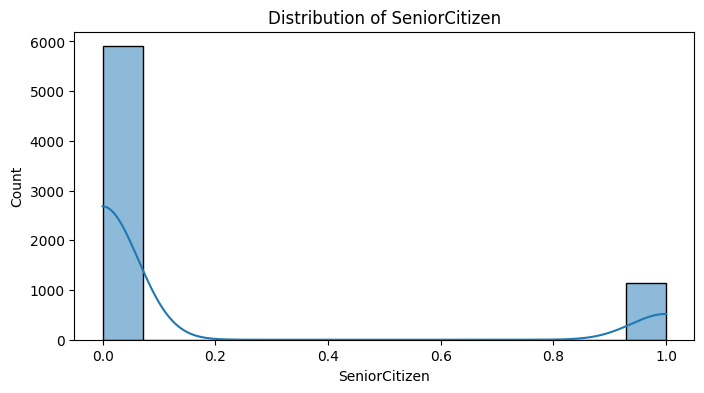

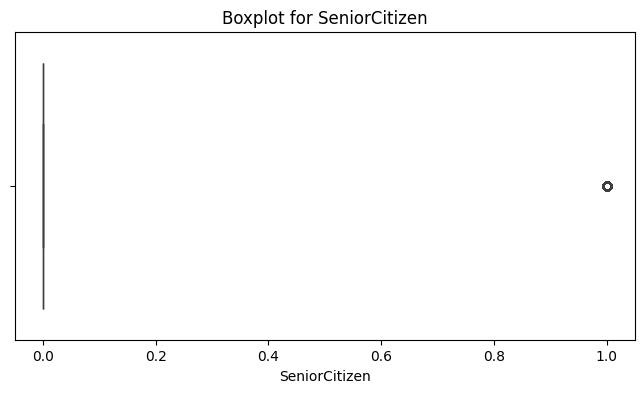

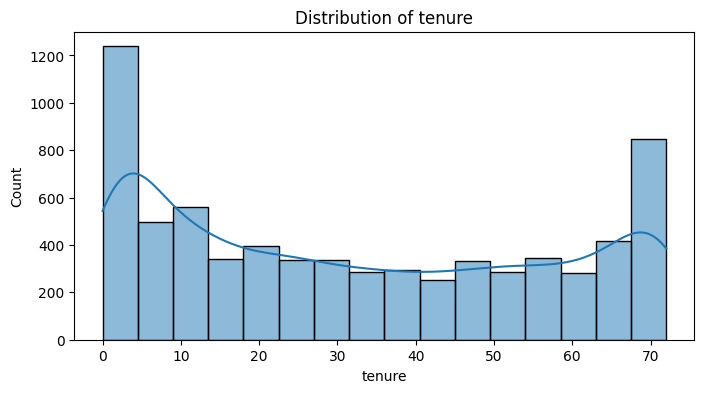

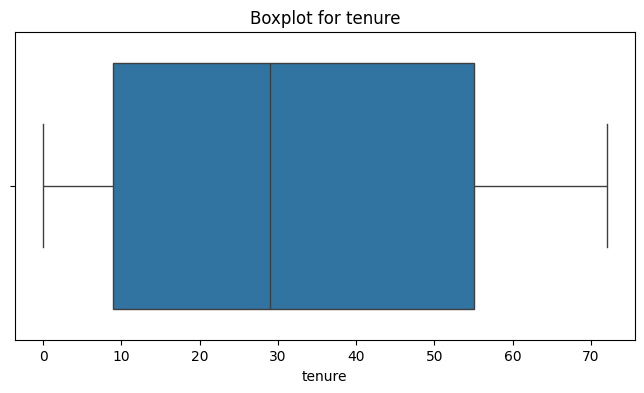

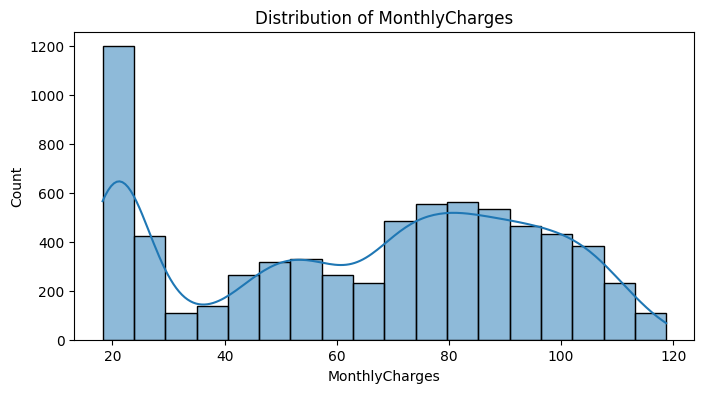

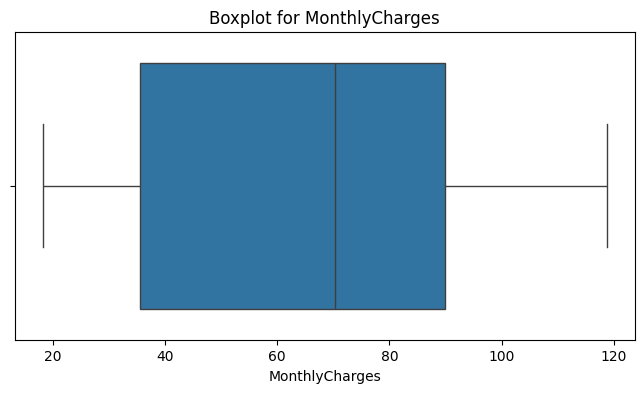

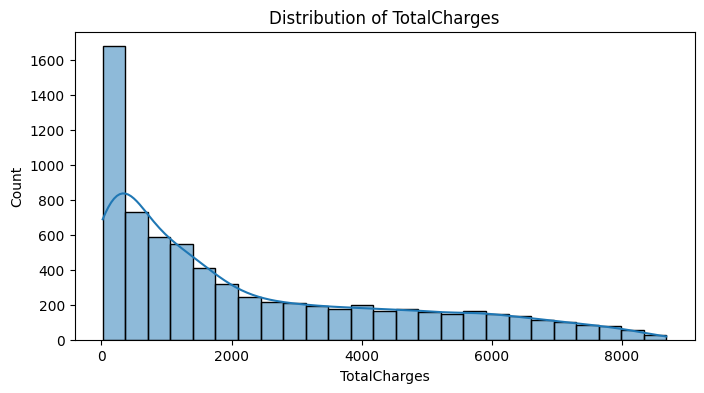

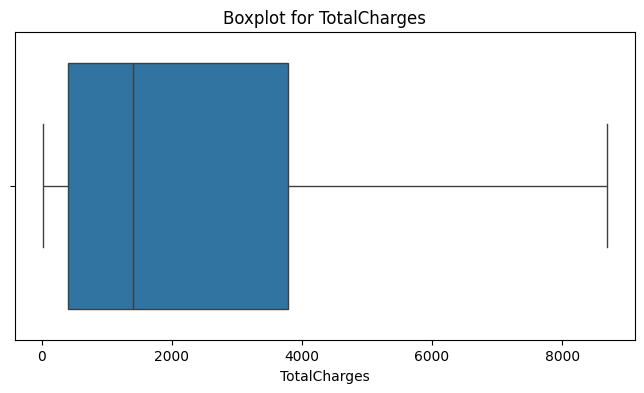

In [ ]:
# Visualize distribution of numerical features
# Numerical columns
numerical_columns = df_telco_cust.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_telco_cust[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    # Check for outliers using boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_telco_cust[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


**Uniqueness and Cardinality Analysis**

In [ ]:
# Check for uniqueness in categorical features
for col in categorical_columns:
    unique_vals = df_telco_cust[col].nunique()
    print(f"Unique values in {col}: {unique_vals}")
    print(f"Value counts for {col}:\n", df_telco_cust[col].value_counts())

# Check for columns with too many unique values (high cardinality)
high_cardinality_columns = [col for col in categorical_columns if df_telco_cust[col].nunique() > 50] # Example threshold
print("Columns with high cardinality:", high_cardinality_columns)


Unique values in customerID: 7043
Value counts for customerID:
 customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64
Unique values in gender: 2
Value counts for gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values in Partner: 2
Value counts for Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values in Dependents: 2
Value counts for Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values in PhoneService: 2
Value counts for PhoneService:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Unique values in MultipleLines: 3
Value counts for MultipleLines:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Unique values in InternetService: 3
Value counts

**Key Findings**

1.   The **customerID** column has **7043** unique values, which is expected since it's a unique identifier for each customer. It is not useful for model building since it doesn't add any predictive value but will be dropped in the future steps.
2.   **gender** is fairly balanced with **3555** males and **3488** females.
3.   **Partner** and **Dependents** have an imbalance, with more customers having No (**3641** for Partner and **4933** for Dependents).
4.   **PhoneService** has **6361** customers with phone service and **682** without, which is expected.
5.   For columns like **MultipleLines**, **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**, a significant proportion of customers have No internet service in these features (ranging from **1526** customers).
6. The majority of customers have a Month-to-month contract (**3875**), followed by Two year (**1695**) and One year (**1473**).
7. The most popular payment method is Electronic check (**2365**), followed by Mailed check, Bank transfer (automatic), and Credit card (automatic).
8. The Churn column shows **5174** customers have not churned (No) and **1869** customers have churned (Yes), indicating that this is a binary target variable for classification.

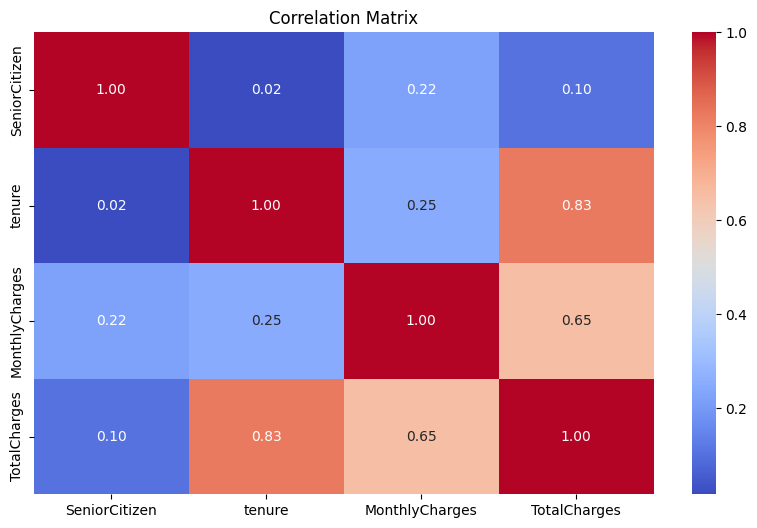

In [ ]:
# Correlation matrix for numerical features
correlation_matrix = df_telco_cust[numerical_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Insight**

*   Tenure is strongly related to TotalCharges (0.83), which suggests that the longer a customer stays with the company, the higher their total charges. Tenure also shows a weak positive relationship with MonthlyCharges (0.25)
*   Since tenure and TotalCharges are strongly correlated, we might consider removing one of these variables in the case of multicollinearity when building a model.



**Outlier Detection**

Rows with outliers:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
193   9680-NIAUV  Female              0     Yes        Yes      72   
198   7255-SSFBC    Male              0     Yes        Yes      72   
369   3520-FJGCV    Male              0     Yes        Yes      72   
437   4376-KFVRS    Male              0     Yes        Yes      72   
464   1480-BKXGA    Male              1     Yes         No      72   
...          ...     ...            ...     ...        ...     ...   
6537  1444-VVSGW    Male              0     Yes         No      70   
6566  3795-CAWEX    Male              0     Yes        Yes      70   
6728  2380-DAMQP  Female              0     Yes         No      72   
6768  9739-JLPQJ  Female              0     Yes        Yes      72   
6859  3508-CFVZL  Female              0      No         No      71   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
193           Yes           Yes     Fiber optic            Yes  ...

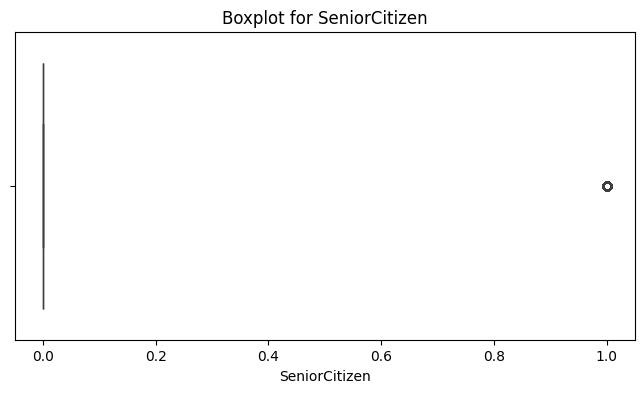

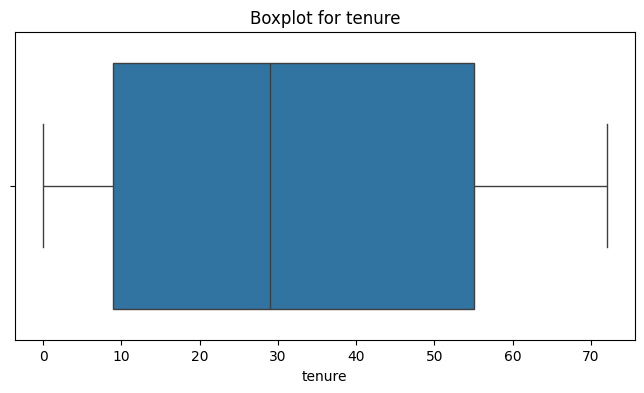

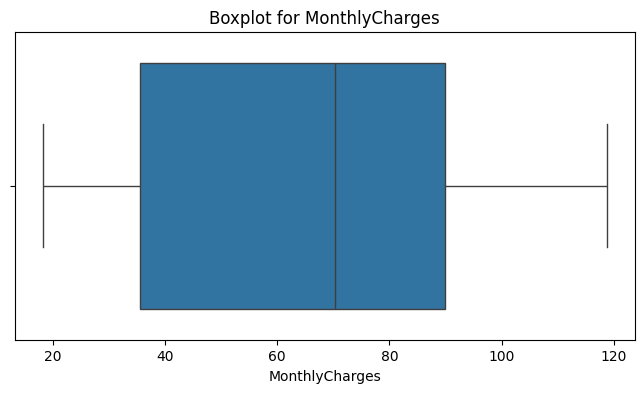

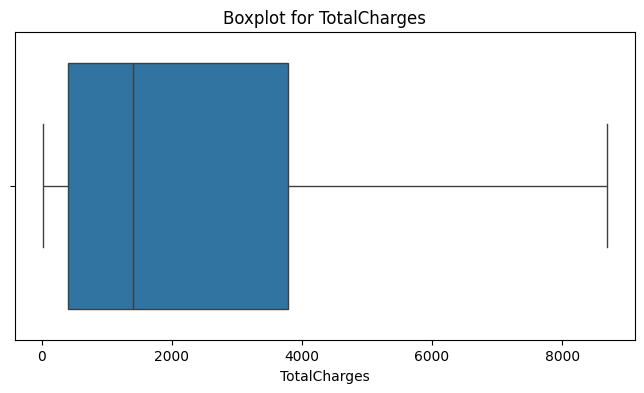

In [ ]:
# Detect outliers using Z-scores (values above 3 or below -3 are considered outliers)
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = df_telco_cust[numerical_columns].apply(zscore)

# Identify outliers (absolute z-score > 3)
outliers = (z_scores > 2.5) | (z_scores < -2.5)
outliers_data = df_telco_cust[outliers.any(axis=1)]
print("Rows with outliers:\n", outliers_data)

# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_telco_cust[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
# Display the rows with outliers
print(df_telco_cust.loc[outliers.any(axis=1)])


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
193   9680-NIAUV  Female              0     Yes        Yes      72   
198   7255-SSFBC    Male              0     Yes        Yes      72   
369   3520-FJGCV    Male              0     Yes        Yes      72   
437   4376-KFVRS    Male              0     Yes        Yes      72   
464   1480-BKXGA    Male              1     Yes         No      72   
...          ...     ...            ...     ...        ...     ...   
6537  1444-VVSGW    Male              0     Yes         No      70   
6566  3795-CAWEX    Male              0     Yes        Yes      70   
6728  2380-DAMQP  Female              0     Yes         No      72   
6768  9739-JLPQJ  Female              0     Yes        Yes      72   
6859  3508-CFVZL  Female              0      No         No      71   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
193           Yes           Yes     Fiber optic            Yes  ...   
198           Yes

**Data Consistency and Validity Checks**

In [ ]:
# Check for inconsistent or invalid values (example: negative MonthlyCharges)
invalid_data = df_telco_cust[df_telco_cust['MonthlyCharges'] < 0]
print("Invalid data (negative MonthlyCharges):\n", invalid_data)

# Check if any columns have inconsistent data (example: inconsistent values in 'Contract' column)
invalid_contract = df_telco_cust[~df_telco_cust['Contract'].isin(['Month-to-month', 'One year', 'Two year'])]
print("Invalid Contract values:\n", invalid_contract)


Invalid data (negative MonthlyCharges):
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Invalid Contract values:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


There is no inconsistency in the data.

##Feature Engineering

Remove the customerID column

In [ ]:
# Drop customerID from the dataset
df_telco_cust.drop('customerID', axis=1, inplace=True)

# Verify that the 'customerID' column has been dropped
df_telco_cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
# def label_encoding(df,features):
#     for i in features:
#         df[i] = df[i].map({"Yes":1, "No":0})
#     return df

# df_telco_cust = label_encoding(df_telco_cust,feature_le)
# df_telco_cust["gender"] = df_telco_cust["gender"].map({"Female":1, "Male":0})

# features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
#                 "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
# df_ohe = pd.get_dummies(df_telco_cust, columns=features_ohe)

# features_mms = ["tenure","MonthlyCharges","TotalCharges"]

# df_mms = pd.DataFrame(df_ohe, columns=features_mms)
# df_remaining = df_ohe.drop(columns=features_mms)

# mms = MinMaxScaler(feature_range=(0,1))
# rescaled_feature = mms.fit_transform(df_mms)

# rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
# df_telco_cust = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [ ]:
# Encode Categorical Features
categorical_cols = df_telco_cust.select_dtypes(include=['category']).columns
df_telco_cust = pd.get_dummies(df_telco_cust, columns=categorical_cols, drop_first=True)

numerical_cols = df_telco_cust.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_telco_cust[numerical_cols] = scaler.fit_transform(df_telco_cust[numerical_cols])

In [ ]:
print(df_telco_cust.dtypes)

SeniorCitizen                            float64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [ ]:
shape = df_telco_cust.shape
print(shape)

(7043, 31)


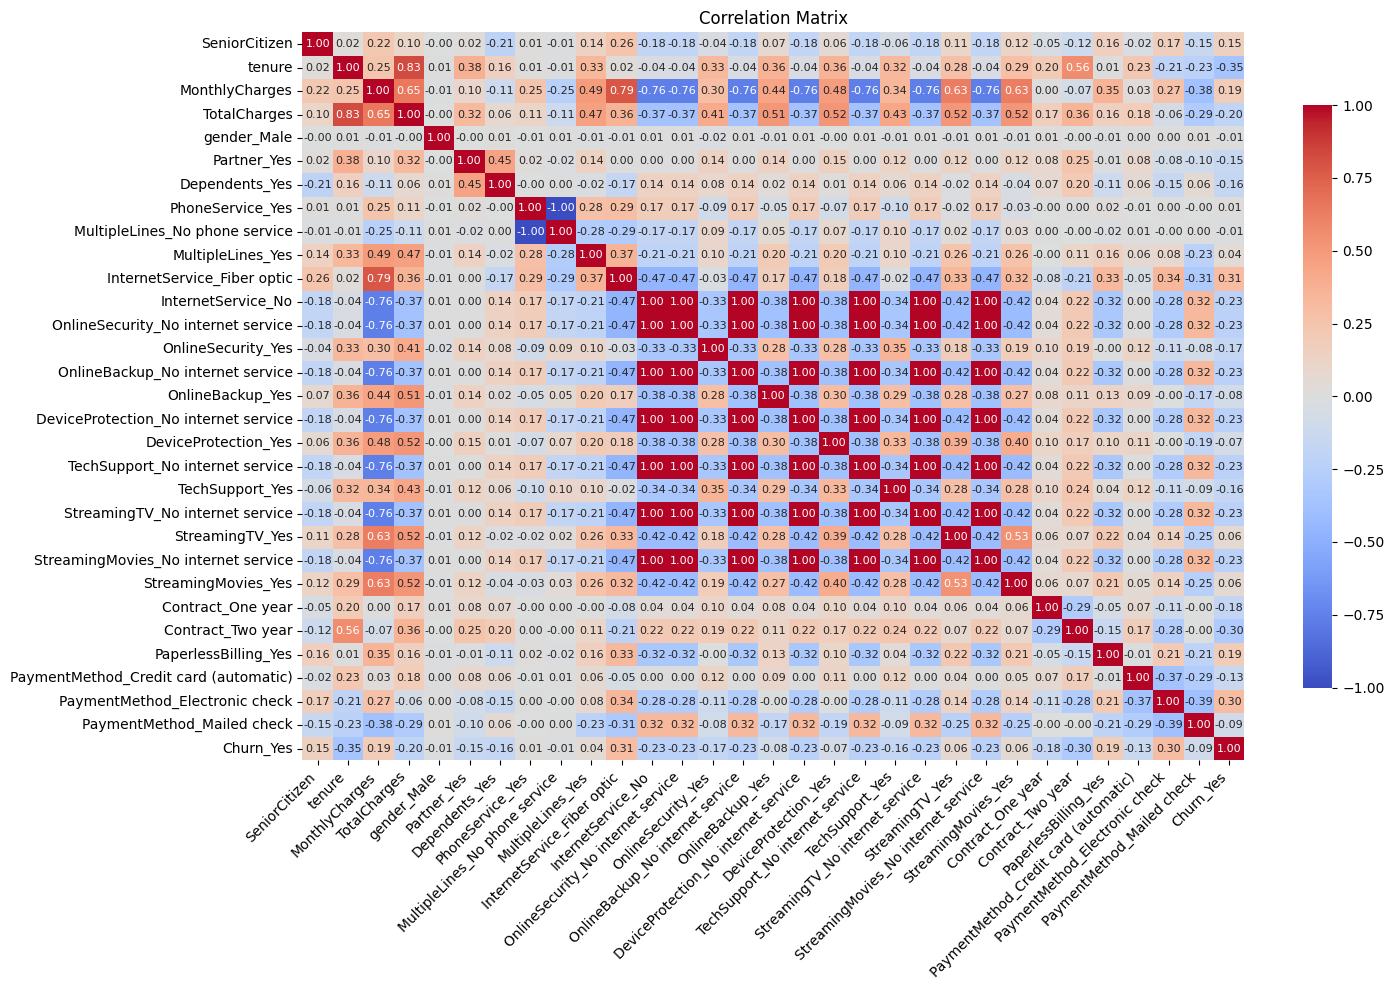

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_telco_cust.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))  # Adjusted size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 8},  # Adjust annotation font size
            cbar_kws={'shrink': 0.8})  # Shrink the color bar
plt.title("Correlation Matrix")

# Rotate the axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

In [ ]:
# Feature Selection - Drop highly correlated features (threshold can be adjusted)
# Set correlation threshold (e.g., 0.9)
threshold = 0.8
# Get the features to drop based on correlation
correlation_matrix_abs = correlation_matrix.abs()
upper_triangle = correlation_matrix_abs.where(np.triu(np.ones(correlation_matrix_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the selected highly correlated features
df_telco_cust = df_telco_cust.drop(columns=to_drop)

# Check remaining features after dropping
print("Remaining features after feature selection:", df_telco_cust.columns)

Remaining features after feature selection: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


In [ ]:
df_telco_cust.head()
df_telco_cust.shape

(7043, 23)

##Splitting the Data into Training and Test Sets

In [ ]:
# Define target variable (Churn) and features (X)
X = df_telco_cust.drop('Churn_Yes', axis=1)  # Dropping target column
y = df_telco_cust['Churn_Yes']  # Churn column as target

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Define target variable (Churn) and features (X)
# X = df_telco_cust.drop('Churn', axis=1)  # Dropping target column
# y = df_telco_cust['Churn']  # Churn column as target

# # Split the data into training and test sets (80% training, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit and Transform the Training Data

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

Transform the Test Data

In [ ]:
# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)

#Model Selection and Implementation

In [ ]:
# Evaluation function
def evaluate(actual, predicted, model_name):
    try:
        precision = precision_score(actual, predicted)
        recall = recall_score(actual, predicted)
        f1 = f1_score(actual, predicted)
        accuracy = accuracy_score(actual, predicted)
    except ValueError as e:
        # Handle case when metrics calculation fails
        return {'Model': model_name, 'Precision_Score': None, 'Recall_Score': None,
                'F1_Score': None, 'Accuracy': None, 'Error': str(e)}

    # Round the scores to 3 decimal places
    result = {
        'Model': model_name,
        'Precision_Score': round(precision, 3),
        'Recall_Score': round(recall, 3),
        'F1_Score': round(f1, 3),
        'Accuracy': round(accuracy, 3)
    }
    return result

# Results container
dict_list = []

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    try:
        # Fit the model on training data
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate
        eval_result = evaluate(y_test, y_pred, model_name)
        dict_list.append(eval_result)
    except Exception as e:
        dict_list.append({'Model': model_name, 'Error': str(e)})

# Convert results to DataFrame
df_results = pd.DataFrame(dict_list)

# Display results
print(df_results)


                                    Model  Precision_Score  Recall_Score  \
0                     Logistic Regression            0.690         0.584   
1                     K-Nearest Neighbors            0.589         0.523   
2                           Decision Tree            0.452         0.450   
3  Support Vector Machine (Linear Kernel)            0.687         0.571   
4     Support Vector Machine (RBF Kernel)            0.692         0.507   
5                          Neural Network            0.653         0.566   
6                           Random Forest            0.639         0.450   
7                       Gradient Boosting            0.682         0.563   

   F1_Score  Accuracy  
0     0.633     0.820  
1     0.554     0.777  
2     0.451     0.710  
3     0.624     0.818  
4     0.585     0.810  
5     0.606     0.806  
6     0.528     0.787  
7     0.617     0.815  


In [ ]:
# Sort the results by Accuracy in descending order
sorted_results = df_results.sort_values(by='Accuracy', ascending=False)

# Display the top 4 models
top_4_models = sorted_results.head(4)

# Print the top 4 models
print(top_4_models[['Model', 'Precision_Score', 'Recall_Score', 'F1_Score', 'Accuracy']])


                                    Model  Precision_Score  Recall_Score  \
0                     Logistic Regression         0.689873      0.584450   
3  Support Vector Machine (Linear Kernel)         0.687097      0.571046   
5                          Neural Network         0.672673      0.600536   
7                       Gradient Boosting         0.681818      0.563003   

   F1_Score  Accuracy  
0  0.632801  0.820440  
3  0.623719  0.817601  
5  0.634561  0.816891  
7  0.616740  0.814762  


##Hyeper Parameter Tuning

In [578]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC  # Support Vector Classifier (RBF, Linear, etc.)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Hyperparameter grids for each model
logistic_regression_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types: 'linear' and 'rbf'
    'gamma': ['scale', 'auto']  # Gamma for 'rbf' kernel
}

gradient_boosting_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5]
}

neural_network_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),  # Support Vector Machine with different kernel types
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=200)
}

# Results container for storing evaluation results
dict_list = []

# Perform hyperparameter tuning with GridSearchCV
for model_name, model in models.items():
    try:
        # Define the parameter grid for each model
        if model_name == 'Logistic Regression':
            params = logistic_regression_params
        elif model_name == 'Support Vector Machine':
            params = svm_params  # Use the grid that includes kernel and gamma for SVC
        elif model_name == 'Gradient Boosting':
            params = gradient_boosting_params
        elif model_name == 'Neural Network':
            params = neural_network_params

        # Create GridSearchCV
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)

        # Fit the model on the training data using GridSearchCV
        grid_search.fit(X_train, y_train)

        # Get the best model after grid search
        best_model = grid_search.best_estimator_

        # Print the best parameters and the best cross-validation score
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")

        # Make predictions using the best model
        y_pred = best_model.predict(X_test)

        # Evaluate the model
        precision = precision_score(y_test, y_pred, pos_label=True)
        recall = recall_score(y_test, y_pred, pos_label=True)
        f1 = f1_score(y_test, y_pred, pos_label=True)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the evaluation results
        eval_result = {
            'Model': model_name,
            'Precision_Score': round(precision, 3),
            'Recall_Score': round(recall, 3),
            'F1_Score': round(f1, 3),
            'Accuracy': round(accuracy, 3)
        }
        dict_list.append(eval_result)

    except Exception as e:
        dict_list.append({'Model': model_name, 'Error': str(e)})



Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.801029470402726
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for Support Vector Machine: 0.798544840748872
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy for Gradient Boosting: 0.7999634358338285
Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best cross-validation accuracy for Neural Network: 0.7976567412817317


In [579]:
# Convert the results to a DataFrame
df_results = pd.DataFrame(dict_list)
print(df_results)


                    Model  Precision_Score  Recall_Score  F1_Score  Accuracy
0     Logistic Regression            0.690         0.574     0.627     0.819
1  Support Vector Machine            0.685         0.601     0.640     0.821
2       Gradient Boosting            0.682         0.563     0.617     0.815
3          Neural Network            0.694         0.504     0.584     0.810
